Procedural vs Functional Programming

Problem Definition:
    
    Given a list of numbers and words, find the count of each element type in the list.

Example:

    Example: L = [2, 3, ’word’, -1, ’python programming language’, 9, 321]
    Count of Numbers: 5
    Count of words: 4

Write a pure python code (No external libraries) to achieve the following:

    1. Create a function the will randomly generate a list of N numbers and words. Numbers and words count are random and the order is random too.
    2. Create two functions to calculate the desired output as follows:
    a. Procedural code by using loops
    b. Functional code by using list comprehension.
    3. Use TimeIt standard library and matplotlib to present the performance difference among the 2 solutions for different list sizes (N=100, 1000, 10000, 100000).


For a list of length : 100
Procedural code-count of numbers:  49 count of words:  51
Functional code-count of numbers:  49 count of words:  51
Procedural code runtime : 0.00022978200000167703 
Functional code runtime : 0.0003963360000014404

For a list of length : 1000
Procedural code-count of numbers:  518 count of words:  482
Functional code-count of numbers:  518 count of words:  482
Procedural code runtime : 0.0007253319999982466 
Functional code runtime : 0.0011386319999999728

For a list of length : 10000
Procedural code-count of numbers:  4903 count of words:  5097
Functional code-count of numbers:  4903 count of words:  5097
Procedural code runtime : 0.0023548879999992778 
Functional code runtime : 0.0020721570000006295

For a list of length : 100000
Procedural code-count of numbers:  50023 count of words:  49977
Functional code-count of numbers:  50023 count of words:  49977
Procedural code runtime : 0.023295957999998507 
Functional code runtime : 0.020132975999999303


<function matplotlib.pyplot.show(*args, **kw)>

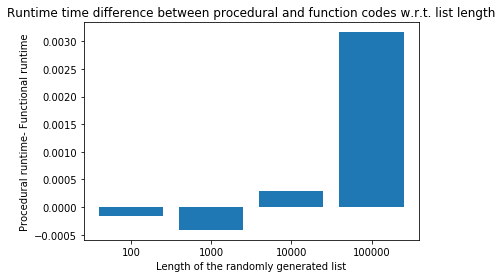

In [2]:
## Import libraries
import random,string,timeit,matplotlib.pyplot

## Function to create a random list
def randomlist(N):
    list_name = []
    empty_string = ''
    random_number = random.randint(1,100)
    for i in range(N):
        if random.randint(1,100) > 50:
            list_name.append(random.randint(1,100))
        else:
            random_string = empty_string.join([random.choice(string.ascii_lowercase) for i in range(random.randint(1,10))])
            list_name.append(random_string)
    return list_name

## Procedural code by using loops to count number of words and numbers
def count_words_and_numbers_loop(list_name):
    count_of_numbers = 0
    for i in range(len(list_name)):
        if type(list_name[i]) == int:
            count_of_numbers = count_of_numbers + 1
    count_of_words = len(list_name) - count_of_numbers
    print("Procedural code-count of numbers: ",count_of_numbers,"count of words: ",count_of_words) 
        
## Functional code by using list comprehension to count number of words and numbers
def count_words_and_numbers_list_comprehension(list_name):
    count_of_numbers = len([1 for i in range(len(list_name)) if type(list_name[i]) == int])
    count_of_words = len(list_name) - count_of_numbers
    print("Functional code-count of numbers: ",count_of_numbers,"count of words: ",count_of_words)
    
x_axis = []
y_axis = []

##Code to generate a random list and to call funtions to count the words and numbers in the list
for list_length in [100,1000,10000,100000]:
    store_list = randomlist(list_length) #calling funtion to generate a random list of words and numbers
    print ("\nFor a list of length :",len(store_list))
    loop_time = timeit.timeit(lambda n = store_list: count_words_and_numbers_loop(n),number = 1) #timeit captures the runtime
    list_time = timeit.timeit(lambda n = store_list: count_words_and_numbers_list_comprehension(n),number = 1) #timeit captures the runtime
    print("Procedural code runtime :",loop_time,"\nFunctional code runtime :",list_time) 
    x_axis.append(str(list_length)) #storing x-axis values for the graph
    y_axis.append(loop_time - list_time) #storing y-axis values for the graph

##Bar graph with length of the list in the x axis and the difference between procedural code runtime and functional code runtime in the y axis
matplotlib.pyplot.bar(x_axis, y_axis) #to plot bargraph
matplotlib.pyplot.title("Runtime time difference between procedural and function codes w.r.t. list length")
matplotlib.pyplot.xlabel("Length of the randomly generated list")
matplotlib.pyplot.ylabel("Procedural runtime- Functional runtime")
matplotlib.pyplot.show

Simple Student Grading System - memory based

In a given course the following applies (use exams.csv):
    
    - The system track students by student name and unique ID.
    - Grades are based on:
        o Exams Score (40% of the final grade)
        o Projects Score (30% of the final grade)
        o Quizzes Score (30% of the final grade)
    - Final Grades based on final score (out of 100) As follows:
        o [90-100]:A ; [80-90): B ; [20-80): C ; [10-20): D ; [0-10): F

Create a data structure (dict!) to store the class related information.
Provide the system user with a console based menu as follows:

    - Load the data set from exams.csv file (file is comma delimited).
    - Print a list of student names, final scores, and letter grades sorted by names.
    - Print score summary (Student Count, Min, Max, mean, mode, and standard deviation)
    - Identify values that are larger than the mean and two times standard deviation
    - Plot a pie chart showing the final letter grades distribution.
    - Create box plots parameters (not drawing them but just computing the numbers [min, max, medial, Q1, Q3] for a box plot).
    - Exit the system.

Data loaded sucessfully!!

Which of the below options would you like to do?
1.Print a list of student names, final scores, and letter grades sorted by names
2.Print score summary (Student Count, Min, Max, mean, mode, and standard deviation)
3.Identify values that are larger than the mean and two times standard deviation
4.Plot a pie chart showing the final letter grades distribution
5.Create box plots parameters (not drawing them but just computing the numbers [min, max, medial, Q1, Q3] for a box plot)
6.Exit the system

4


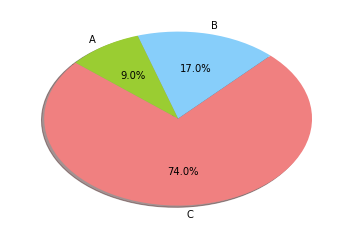

In [ ]:
# This code opens up a button which can be used to load data - exams.csv
# The button can also be used to reload/refresh the console inddition to loading exams.csv 
# After loading the data, the options in the console will let you explore simple student grading system

# Defining Function to load data, calculate final scores and grades and create dictionary 
def load_data():
    
    #Load exams.csv
    data_load_counter = 1
    file_name = 'exams.csv'
    with open(file_name,'r') as f:
        data = f.readlines()
    student_list = [elm.split(',')[1] + elm.split(',')[0] for elm in data]
    
    #Calculate final scores and grades 
    del(student_list[0])
    quizzes = [elm.split(',')[2]for elm in data]
    projects = [elm.split(',')[3]for elm in data]
    exams = [elm.split(',')[4]for elm in data]
    grades_list = []
    sum_of_scores_list = []
    for i in range(len(student_list)+1):
        if i != 0:
            sum_of_scores = (0.3*float(quizzes[i]))+(0.3*float(projects[i]))+(0.4*float(exams[i]))
            if sum_of_scores >= 90:
                grades = "A"
            elif sum_of_scores >= 80 and sum_of_scores < 90:
                grades = "B"
            elif sum_of_scores >= 20 and sum_of_scores < 80:
                grades = "C"
            elif sum_of_scores >= 10 and sum_of_scores < 20:
                grades = "D"
            else:
                grades = "F"
            sum_of_scores_list.append(sum_of_scores)
            grades_list.append(grades)
    del(quizzes[0])
    del(projects[0])
    del(exams[0])
    
    #Create a list of dictionaries
    class_list_dict = []
    for i in range(len(student_list)):
        class_list_dict.append({"Student": student_list[i],"Quizzes": quizzes[i],"Projects": projects[i],"Exams": exams[i],"sum_of_scores":sum_of_scores_list[i],"Grades": grades_list[i]})

    #Options to be displayed in the console and the corresponding calculations
    
    print("Which of the below options would you like to do?")
    print("1.Print a list of student names, final scores, and letter grades sorted by names")
    print("2.Print score summary (Student Count, Min, Max, mean, mode, and standard deviation)")
    print("3.Identify values that are larger than the mean and two times standard deviation")
    print("4.Plot a pie chart showing the final letter grades distribution")
    print("5.Create box plots parameters (not drawing them but just computing the numbers [min, max, medial, Q1, Q3] for a box plot)")
    print("6.Exit the system\n")
    
    #Get user input
    input_option = int(input())
    #Code to to print a list of student names with their details when user input is 1
    if input_option == 1:
        sorted_class_list_dict = sorted(class_list_dict, key=lambda k: k['Student']) 
        for i in range(len(sorted_class_list_dict)):
            if i == 0:
                print("Student\t\tFinal Scores\t\tLetter Grades")
                print((sorted_class_list_dict[i])['Student'],"\t\t",round((sorted_class_list_dict[i])['sum_of_scores'],2),"\t\t",(sorted_class_list_dict[i])['Grades'])
            else:
                print((sorted_class_list_dict[i])['Student'],"\t\t",round((sorted_class_list_dict[i])['sum_of_scores'],2),"\t\t",(sorted_class_list_dict[i])['Grades'])
        print("\n")
    #Code to to print score summary when user input is 2
    elif input_option == 2:
        print("Student Count :",len(student_list))
        print("Minimum Final Score :",round(min(sum_of_scores_list)))
        print("Maximum Final Score :",round(max(sum_of_scores_list)))
        print("Mean Final Score :",round(sum(sum_of_scores_list)/len(student_list)))
        temp_list = []
        for i in range(len(sum_of_scores_list)):
            temp_list.append(round(sum_of_scores_list[i]))
        print("Mode Final Score :",max(set(temp_list), key=temp_list.count))
        print("Standard Deviation of the Final Score :",round(statistics.stdev(sum_of_scores_list),2),"\n")
    #Code to to print scores which are greater than 2 sd from the mean when user input is 3
    elif input_option == 3:
        ul = round(sum(sum_of_scores_list)/len(student_list)) + (2*round(statistics.stdev(sum_of_scores_list),2))
        outlier_list = []
        for i in range(len(sum_of_scores_list)):
            if sum_of_scores_list[i] > ul:
                outlier_list.append(round(sum_of_scores_list[i],2))
        print("Final Scores which are larger than two standard deviation from the mean :",outlier_list,"\n")
    #Code to plot pie chart when user input is 4
    elif input_option == 4:
        grade_pie_input=collections.Counter(grades_list)
        plt.pie(grade_pie_input.values(),labels = grade_pie_input.keys(),autopct='%1.1f%%', colors = ['lightcoral','lightskyblue','yellowgreen'],shadow=True, startangle=140)
        plt.show()
        #top.destroy()
        
    #Code to print box plot parameters when user input is 4
    elif input_option == 5:
        print("input is 6")
        print("Minimum Final Score :",round(min(sum_of_scores_list)))
        print("Maximum Final Score :",round(max(sum_of_scores_list)))
        print("Median Final Score :",round(statistics.median(sum_of_scores_list)))
        print("Q1 Final Score :",round(numpy.percentile(sum_of_scores_list, 25)))
        print("Q3 Final Score :",round(numpy.percentile(sum_of_scores_list, 75)),"\n")
    #Code to close button and exit console
    elif input_option == 6:
        print("Exiting console\n")
        top.destroy()
    #Code to close button and exit console
    else:
        print("Invalid Option!! Exiting console\n")
        top.destroy()
    
#import libraries
import matplotlib.pyplot as plt,collections, statistics,numpy,re,tkinter as tk

# Adding button to load data or refresh the console
data_load_counter = 0
def callback():
    if data_load_counter == 0:
        print('Data loaded sucessfully!!\n')
        load_data()
    else:
        print('Data already loaded!!\n')
        load_data()

top = tk.Tk()
MyButton1 = tk.Button(top, text="Load Data/Refresh console", width=25, command=callback)
MyButton1.grid(row=1, column=1)
top.mainloop()

Summarizing the functionality provided by the library BeautifulSoup with a usage example

In [167]:
#Web scraping is a scalable way to collect, organize, and analyze information on the Internet
#Beautiful Soup is a Python library designed for webscraping 
#Beautiful Soup provides a way for navigating through websites
#Beautiful Soup sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree.
#The below example uses Beautiful Soup to web scrap the names of MSiA class of 2018 from Northwestern website

# Import libraries
import urllib.request as urllib2
from bs4 import BeautifulSoup

# Specify the url
quote_page = 'https://www.mccormick.northwestern.edu/analytics/our-students-alumni/meet-students/class-of-2018.html'

# Query the website and return the html to the variable page
page = urllib2.urlopen(quote_page)

# Parse the html using beautiful soup and store in variable soup
soup = BeautifulSoup(page, 'html.parser')

# Since all student names are mentioned under the tag faculty cf we find all those instances
all_students = soup.findAll('div', attrs={'class': 'faculty cf'})

print("MSiA class of 2018:\n")

# For loop to extract all the names from the faculty cf tag
for i in range(len(all_students)):
    temp = (all_students[i].findAll('h3'))[0].getText()
    print(temp)

MSiA class of 2018:

Patrick Chang
Jamie Chen
Jerry Chen
Johnny Chiu
Luca Colombo
Grace Cui
Anisha Dubhashi
Jill Fan
Matt Gallagher
Michael Gao
Lauren Gardiner
Joe Gilbert
Sarah Greenwood
Varun Gupta
Veronica Hsieh
Wenze Hu
Rishabh Joshi
Brooke Kennedy
Arvind Koul
Tucker Lewis
Emma Li
Wei Li
Zili Li
Junxiong Liu
Yuqing Liu
Daniel Lütolf-Carroll
Spencer Moon
Kehan Pan
Michael Pauleen
Chris Rozolis
Will Song
Christa Spieth
Penny Sun
Phyllis Sun
Saurabh Tripathi
Vincent Wang
Logan Wilson
Hao Xiao
Wenjing Yang
Tong Yin
Ethel Zhang
